In [36]:
import os
import librosa
import pywt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'output/key/ARP_Gitano/ARP_Gitano__base.mp3'
DUMMY_FILE = 'dummy.wav'
sample_rate = 44100

def load_mp3(filename):
    os.system("ffmpeg -i " + filename + " -acodec pcm_s16le -ar " + str(sample_rate) + " " + DUMMY_FILE)
    
load_mp3(filename)
audio, sr = librosa.core.load(DUMMY_FILE, sr=sample_rate, mono=True)

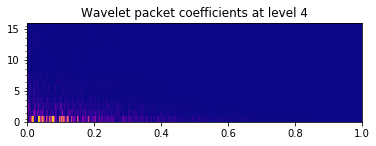

In [55]:
x = np.linspace(0, 1, num=512)
data = np.sin(250 * np.pi * x**2)

wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.plasma

# Construct wavelet packet
wp = pywt.WaveletPacket(audio, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

fig = plt.figure()


ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)


plt.show()